In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
library(plotly)


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [3]:
train <- read_csv('train.csv')
test  <- read_csv('test.csv')

Parsed with column specification:
cols(
  id = col_integer(),
  date = col_character(),
  time = col_time(format = ""),
  invoice_id = col_integer(),
  stock_id = col_integer(),
  customer_id = col_integer(),
  country = col_character(),
  description = col_character(),
  unit_price = col_double(),
  quantity = col_integer()
)
Parsed with column specification:
cols(
  id = col_integer(),
  date = col_character(),
  time = col_time(format = ""),
  invoice_id = col_integer(),
  stock_id = col_integer(),
  customer_id = col_integer(),
  country = col_character(),
  description = col_character(),
  unit_price = col_double()
)


In [4]:
head(train)

id     date       time     invoice_id stock_id customer_id country       
1 330477 8/30/2011  12:26:00  357        198        7        united kingdom
2 113814 11/1/2011  14:54:00 6757       2747      410        united kingdom
3  51510 7/11/2011  16:21:00   52        755        7        united kingdom
4 257784 10/11/2011 14:52:00 3642       1942     1722        france        
5 431803 11/14/2011 14:59:00 2105         39     1159        united kingdom
6 473125 12/3/2010  11:35:00 1768        506     1009        united kingdom
  description                       unit_price quantity
1 french blue metal door sign 3     2.46       1       
2 paper lantern 9 point deluxe star 6.65       4       
3 fruit salad bag charm             2.46       1       
4 set of 10 led dolly lights        6.25       2       
5 glitter christmas star            0.39       5       
6 set 20 napkins fairy cakes design 0.85       1

In [14]:
head(test)

id     date       time     invoice_id stock_id customer_id country       
1  36260 4/3/2011   15:22:00  2          2        2          united kingdom
2 156272 9/14/2011  15:41:00 10          9        9          united kingdom
3 155140 12/16/2010 14:27:00 11         10       10          united kingdom
4 504947 3/7/2011   12:31:00 12         11       11          united kingdom
5  65461 10/25/2011 13:17:00 16         15       14          united kingdom
6 307052 7/19/2011  12:43:00 17         16       15          finland       
  description                       unit_price
1 lunch bag pink polkadot           1.65      
2 mint diner wall clock             7.65      
3 red drawer knob acrylic edwardian 1.25      
4 kitchen metal sign                0.55      
5 vintage cream cat food container  6.35      
6 toilet metal sign                 0.55

In [5]:
train %>% filter(unit_price > 2000)

id     date       time     invoice_id stock_id customer_id country       
1  443396 8/12/2011  14:50:00 20220      3614        7        united kingdom
2  361107 11/23/2011 11:11:00  1682       512        7        united kingdom
3  414693 4/4/2011   13:04:00 19200       192      240        singapore     
4    1208 4/4/2011   13:03:00 19227       192      240        singapore     
5  284967 10/27/2011 14:20:00 18002       192     1722        france        
6  524260 8/11/2011  09:38:00 19431       192     1537        united kingdom
7   38367 12/5/2011  11:58:00  1784       512        7        united kingdom
8  456339 10/19/2011 11:18:00 11912       192      240        singapore     
9  190017 10/27/2011 14:13:00 18449       192     1722        france        
10 138905 10/19/2011 11:18:00 11912       192      240        singapore     
11 366920 9/19/2011  16:14:00 11196       192        7        hong kong     
12  89631 11/25/2011 15:23:00  2062       512        7        united kingdom
13 342736 5/3/2011   13:46:00 19973        95     1155        united kingdom
14 204725 10/3/2011  16:44:00 18879       192      930        united kingdom
15 307273 10/31/2011 14:41:00    38       512        7        united kingdom
   description     unit_price quantity
1  adjust bad debt 11062.06   1       
2  dotcom postage   2275.54   1       
3  manual           2053.07   1       
4  manual           2382.92   1       
5  manual           4161.06   1       
6  manual           2500.00   1       
7  dotcom postage   2114.00   1       
8  manual           2118.74   1       
9  manual           4161.06   1       
10 manual           3949.32   1       
11 manual           2653.95   1       
12 dotcom postage   2028.25   1       
13 postage          8142.75   1       
14 manual           3155.95   1       
15 dotcom postage   2019.05   1

In [16]:
train %>% filter(stock_id == 433)

id     date       time     invoice_id stock_id customer_id country       
1   128613 6/7/2011   16:04:00  3392      433       302        united kingdom
2   147756 11/17/2011 08:29:00 10607      433       795        germany       
3   420886 11/23/2011 12:20:00   243      433       173        united kingdom
4   269412 1/27/2011  09:42:00  4514      433      1571        united kingdom
5    76062 10/9/2011  13:44:00  5179      433      2160        united kingdom
6   223530 3/4/2011   14:02:00  7253      433        74        eire          
7    37988 11/25/2011 10:03:00 10259      433       170        united kingdom
8   116150 9/15/2011  10:53:00  7121      433      2654        united kingdom
9   224536 5/4/2011   11:58:00   285      433       201        united kingdom
10  346019 7/28/2011  10:14:00  3473      433       467        united kingdom
11  370165 3/7/2011   11:54:00  6003      433      1910        united kingdom
12   23283 7/26/2011  09:20:00  4892      433      2081        united kingdom
13  375354 4/8/2011   11:50:00  1501      433       119        united kingdom
14  501586 10/7/2011  12:42:00 16179      433      2507        united kingdom
15  377171 10/11/2011 10:41:00 13106      433      1852        united kingdom
16  119672 3/15/2011  10:49:00 15849      433      3993        united kingdom
17   80217 12/1/2011  12:01:00  2429      433        43        united kingdom
18   20063 12/10/2010 09:51:00   702      433         7        united kingdom
19  249388 11/23/2011 12:36:00  7529      433       714        united kingdom
20  139378 12/14/2010 14:42:00  3626      433       861        united kingdom
21   31210 11/3/2011  11:43:00  8193      433      1051        united kingdom
22  406004 4/28/2011  14:39:00  8959      433      3024        united kingdom
23  372899 11/30/2011 09:18:00 10667      433       861        united kingdom
24  449514 11/4/2011  13:25:00  4781      433      2052        united kingdom
25  249736 8/8/2011   12:00:00  6376      433      1137        united kingdom
26  378282 11/4/2011  10:23:00 13767      433       587        united kingdom
27  492054 6/28/2011  15:36:00  8754      433       857        united kingdom
28  105883 7/22/2011  14:13:00 13084      433         7        united kingdom
29  468424 8/4/2011   16:38:00  1582      433         7        united kingdom
30  343524 10/17/2011 13:31:00   821      433        13        united kingdom
⋮   ⋮      ⋮          ⋮        ⋮          ⋮        ⋮           ⋮             
355 146926 4/21/2011  12:11:00  9849      433      1488        united kingdom
356 494675 7/27/2011  13:14:00 15614      433        74        eire          
357 237688 7/6/2011   13:13:00  2917      433      1003        united kingdom
358 519579 7/26/2011  15:29:00  3040      433       141        united kingdom
359 359691 11/6/2011  15:11:00   659      433         3        united kingdom
360 104167 3/13/2011  15:25:00  7192      433        23        united kingdom
361 451409 12/7/2010  18:36:00   619      433         7        united kingdom
362   8586 7/21/2011  17:08:00  5299      433      2201        united kingdom
363  94560 12/16/2010 11:27:00  6782      433      1711        united kingdom
364 504710 5/4/2011   10:15:00  1299      433       777        united kingdom
365  96824 4/19/2011  15:37:00  2844      433         7        united kingdom
366  49495 7/24/2011  11:40:00  4409      433      1945        united kingdom
367 159230 9/20/2011  13:42:00  5135      433       684        united kingdom
368 495804 11/4/2011  12:45:00   100      433        79        united kingdom
369 172044 5/17/2011  12:43:00  6640      433       657        united kingdom
370 273848 4/12/2011  15:30:00 13021      433      2504        united kingdom
371 404679 12/2/2010  17:38:00 16348      433      4055        united kingdom
372 391012 4/17/2011  11:45:00  8614      433      2966        united kingdom
373 283788 2/8/2011   14:58:00  6255      433      2461        united kingdom
374 252810 5/11/2011  14:2

In [17]:
train_1000 = train %>% filter(quantity <= 2000)


In [18]:
train_1000 = train %>% filter(quantity <= 2000
ggplot(data=train_1000, aes(quantity) ) + geom_histogram(binwidth=5)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected symbol
1: train_1000 = train %>% filter(quantity <= 2000
2: ggplot
   ^


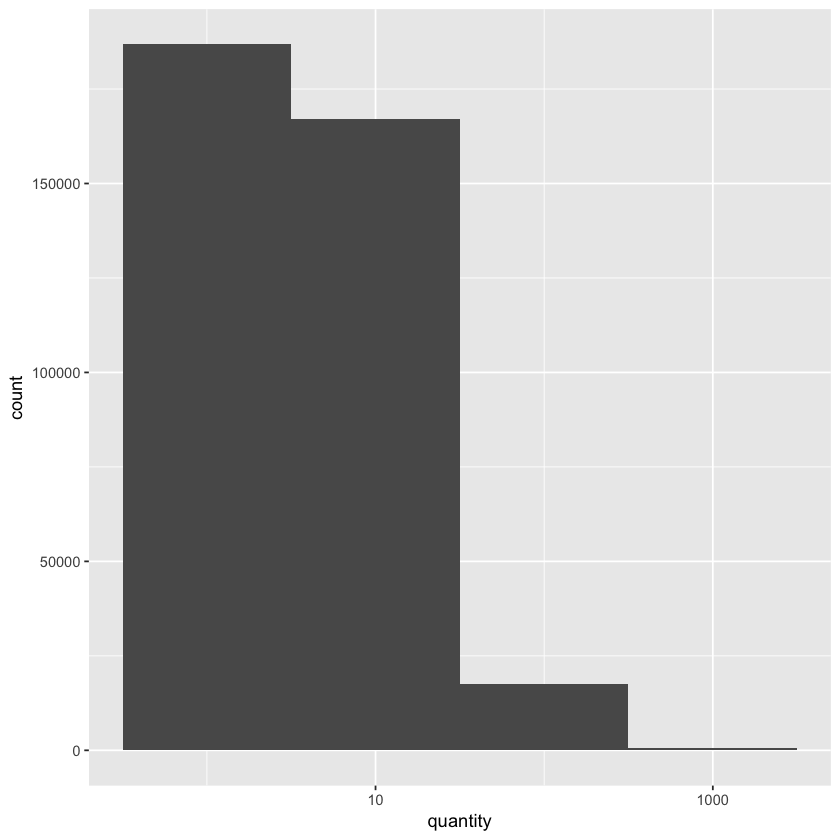

In [19]:
train_1000 = train %>% filter(quantity <= 2000)
ggplot(data=train_1000, aes(quantity) ) + geom_histogram(binwidth=1) + scale_x_log10()

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 256 rows containing missing values (geom_bar).”

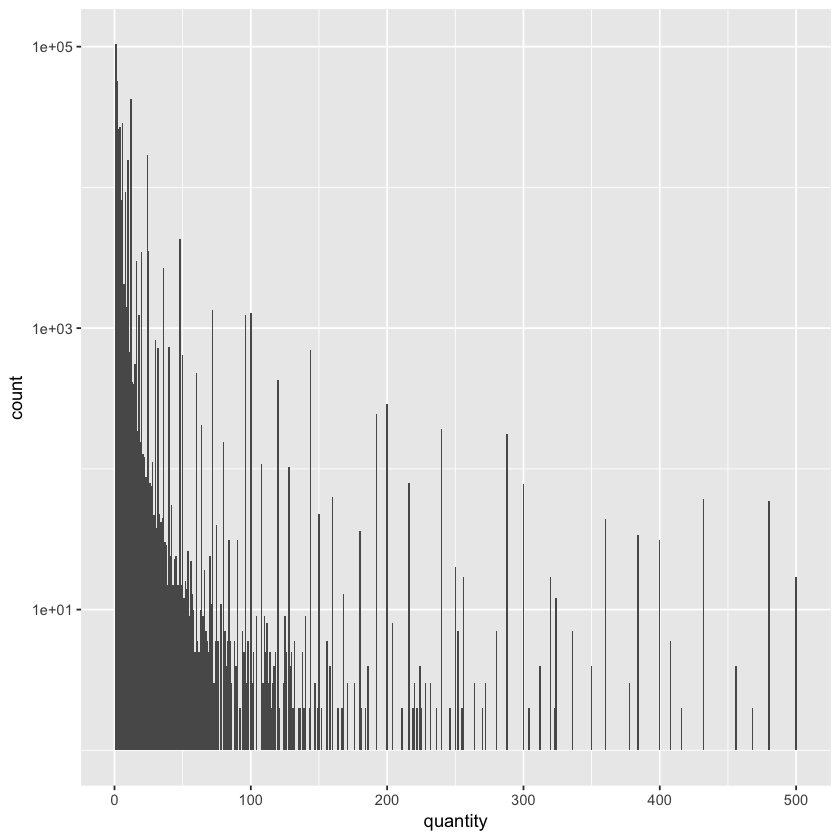

In [20]:
train_1000 = train %>% filter(quantity <= 500)
ggplot(data=train_1000, aes(quantity) ) + geom_histogram(binwidth=1) + scale_y_log10()

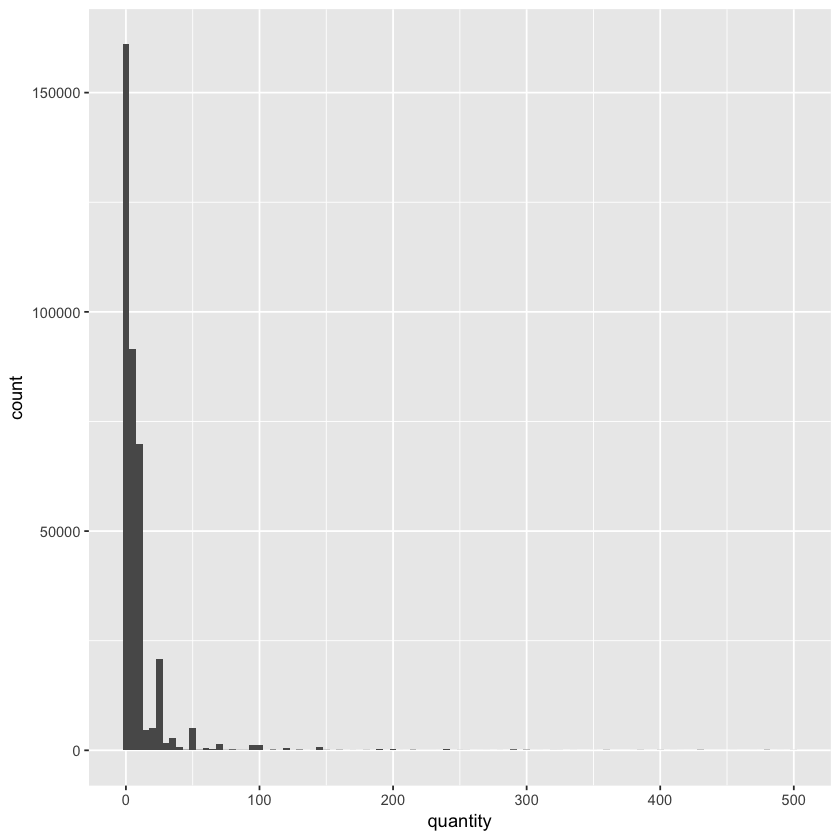

In [21]:
train_1000 = train %>% filter(quantity <= 500)
ggplot(data=train_1000, aes(quantity) ) + geom_histogram(binwidth=5)

In [25]:

train_100 = train %>% filter(quantity > 10) %>% filter(quantity <= 20) %>% sample_frac(.1, replace = FALSE)

p = plot_ly(x = train_1000$quantity, type = "histogram")



In [26]:
glimpse(train_100)

Observations: 5,294
Variables: 10
$ id          <int> 383642, 322679, 224037, 104887, 391569, 288447, 513398,...
$ date        <chr> "11/1/2011", "10/20/2011", "12/6/2011", "12/7/2011", "7...
$ time        <time> 14:51:00, 09:04:00, 10:05:00, 11:03:00, 11:21:00, 15:3...
$ invoice_id  <int> 11310, 10411, 8568, 10880, 1031, 4149, 5767, 5159, 1257...
$ stock_id    <int> 318, 1311, 115, 64, 313, 699, 46, 41, 477, 1280, 615, 5...
$ customer_id <int> 188, 2196, 7, 2594, 346, 1879, 2330, 7, 2633, 7, 1829, ...
$ country     <chr> "united kingdom", "united kingdom", "united kingdom", "...
$ description <chr> "3 drawer antique white wood cabinet", "set of 6 snack ...
$ unit_price  <dbl> 8.15, 0.83, 8.29, 2.95, 0.65, 1.65, 2.08, 1.63, 0.42, 1...
$ quantity    <int> 12, 16, 20, 12, 12, 12, 12, 14, 12, 18, 12, 12, 18, 20,...


In [27]:
p

HTML widgets cannot be represented in plain text (need html)

In [5]:
desc = train$description

In [36]:
dollies = grep('dolly', desc)

In [37]:
head(train[dollies,])

id     date       time     invoice_id stock_id customer_id country       
1 257784 10/11/2011 14:52:00  3642      1942     1722        france        
2 363156 5/6/2011   12:00:00  3808      1936     1786        united kingdom
3 390044 11/11/2011 15:49:00  7545       352     2734        united kingdom
4 194103 10/6/2011  12:22:00  9285       379     3006        united kingdom
5 172211 12/2/2011  09:32:00  9018      1942     2063        united kingdom
6 107105 1/18/2011  16:05:00 11601      1936        7        united kingdom
  description                     unit_price quantity
1 set of 10 led dolly lights      6.25        2      
2 toy tidy dolly girl design      2.10        5      
3 60 cake cases dolly girl design 0.55       24      
4 lunch bag dolly girl design     1.65        2      
5 set of 10 led dolly lights      5.39       12      
6 toy tidy dolly girl design      4.13        1

In [38]:
head(desc)

[1] "french blue metal door sign 3"     "paper lantern 9 point deluxe star"
[3] "fruit salad bag charm"             "set of 10 led dolly lights"       
[5] "glitter christmas star"            "set 20 napkins fairy cakes design"

In [41]:
head(dollies)
train[4,]

[1]   4  46 134 267 300 340

id     date       time     invoice_id stock_id customer_id country
1 257784 10/11/2011 14:52:00 3642       1942     1722        france 
  description                unit_price quantity
1 set of 10 led dolly lights 6.25       2

In [42]:
dolly_rows = train[dollies,]

In [43]:
head(dolly_rows)

id     date       time     invoice_id stock_id customer_id country       
1 257784 10/11/2011 14:52:00  3642      1942     1722        france        
2 363156 5/6/2011   12:00:00  3808      1936     1786        united kingdom
3 390044 11/11/2011 15:49:00  7545       352     2734        united kingdom
4 194103 10/6/2011  12:22:00  9285       379     3006        united kingdom
5 172211 12/2/2011  09:32:00  9018      1942     2063        united kingdom
6 107105 1/18/2011  16:05:00 11601      1936        7        united kingdom
  description                     unit_price quantity
1 set of 10 led dolly lights      6.25        2      
2 toy tidy dolly girl design      2.10        5      
3 60 cake cases dolly girl design 0.55       24      
4 lunch bag dolly girl design     1.65        2      
5 set of 10 led dolly lights      5.39       12      
6 toy tidy dolly girl design      4.13        1

In [60]:
get_desc_word_rows = function(data, desc_word) {
    desc = data$description
    rows = grep(desc_word, desc)
    new_data = data %>% mutate(has_word = 0)
    new_data[rows]$has_word = 1
    return (data[rows,])
}

In [120]:
plot_desc_word_rows = function(data, desc_word) {
    desc = data$description
    rows = grep(desc_word, desc)
    new_data = data %>% mutate(has_word = 0)
    new_data[rows,]$has_word= 1
    
    return (ggplot(data=new_data, aes(x=quantity)) + scale_x_log10() + scale_y_log10() + facet_wrap(~has_word)  + geom_histogram(binwidth=.1))
}

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 34 rows containing missing values (geom_bar).”

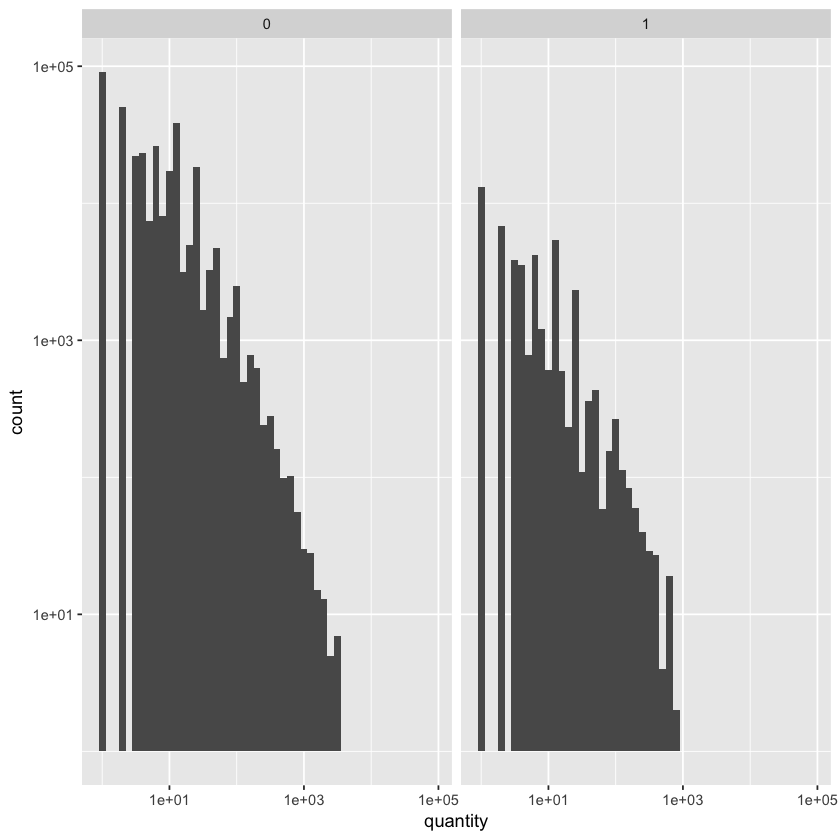

In [121]:
plot_desc_word_rows(train, "set")


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 35 rows containing missing values (geom_bar).”

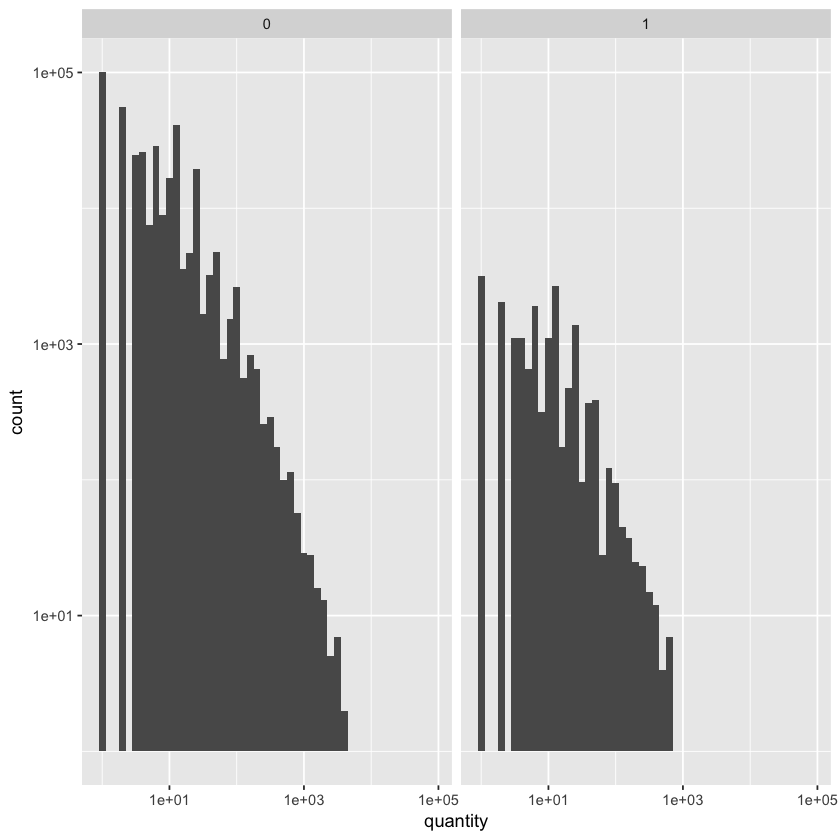

In [122]:
plot_desc_word_rows(train, "christmas")


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 35 rows containing missing values (geom_bar).”

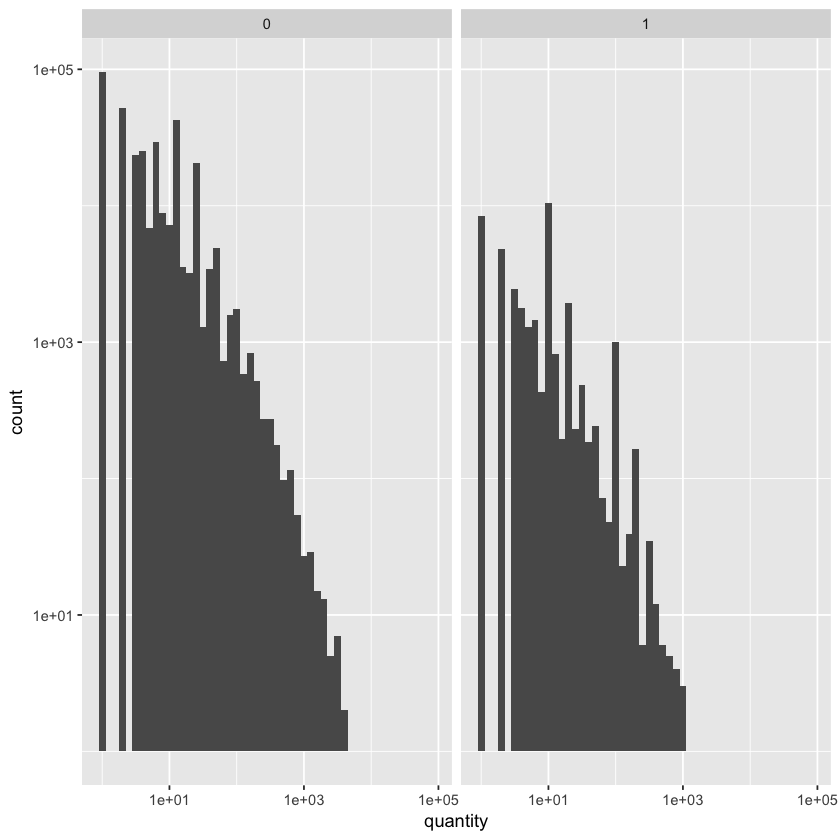

In [123]:
plot_desc_word_rows(train, "bag")


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 35 rows containing missing values (geom_bar).”

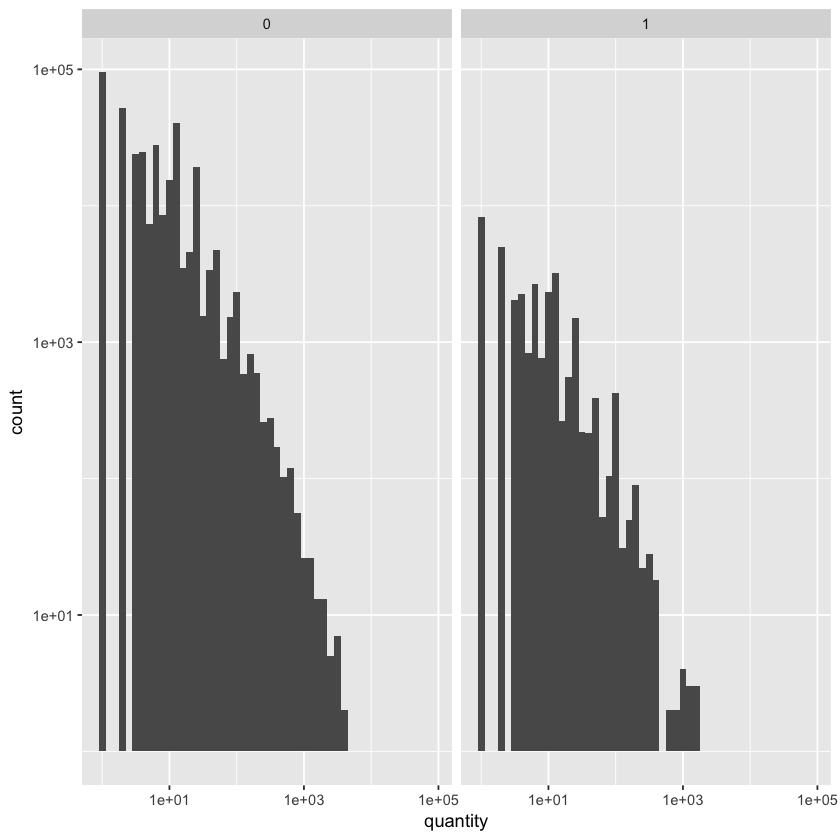

In [124]:
plot_desc_word_rows(train, "red")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 33 rows containing missing values (geom_bar).”

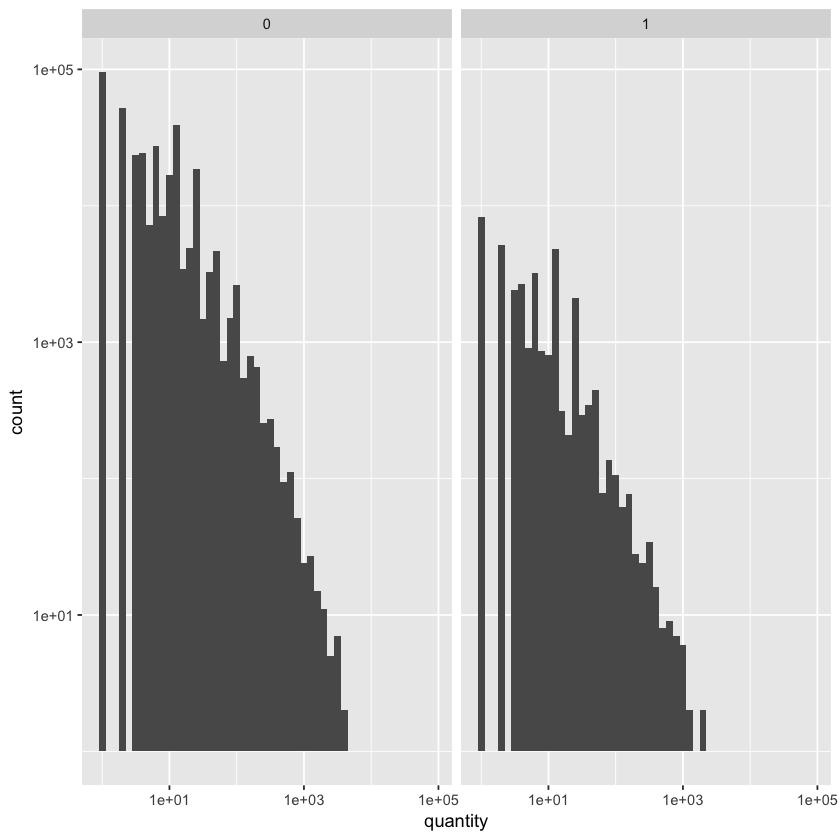

In [125]:
plot_desc_word_rows(train, "heart")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 33 rows containing missing values (geom_bar).”

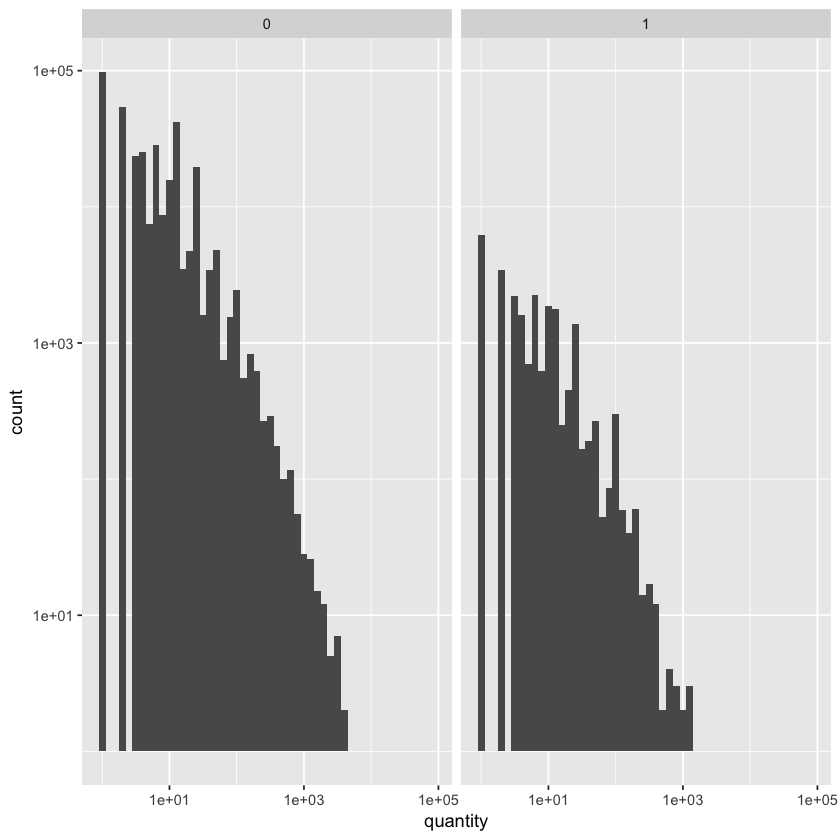

In [126]:
plot_desc_word_rows(train, "retrospot")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 34 rows containing missing values (geom_bar).”

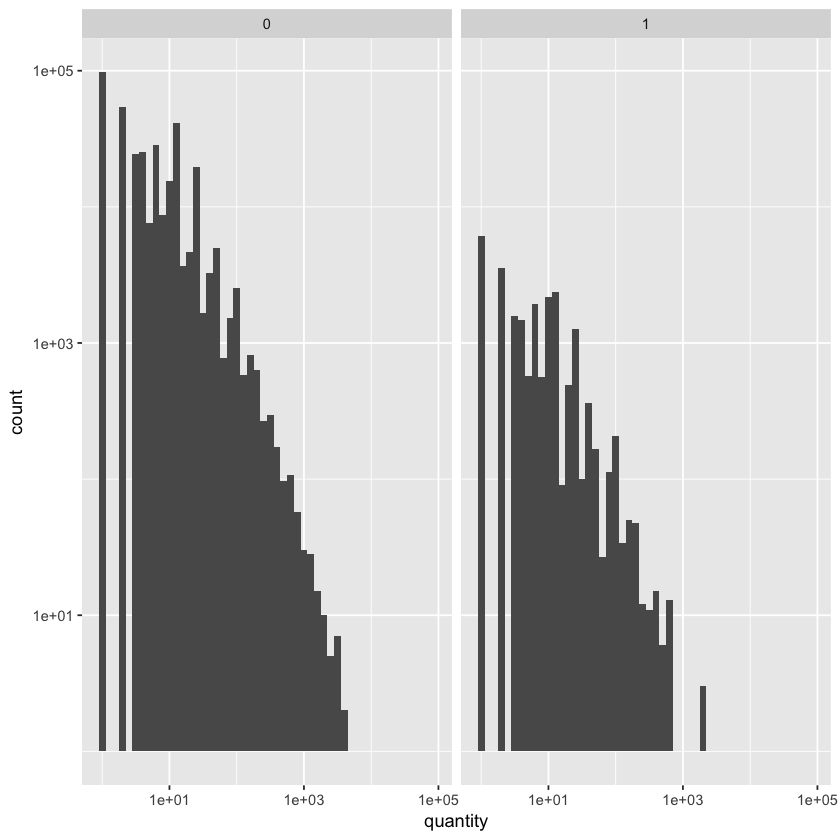

In [127]:
plot_desc_word_rows(train, "vintage")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 31 rows containing missing values (geom_bar).”

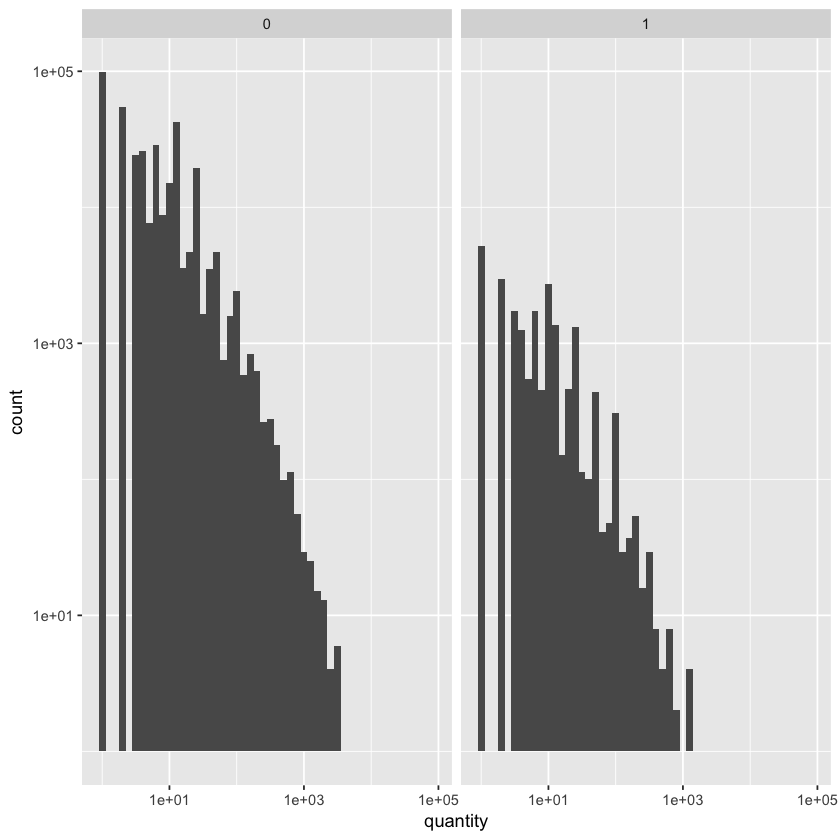

In [128]:
plot_desc_word_rows(train, "design")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 35 rows containing missing values (geom_bar).”

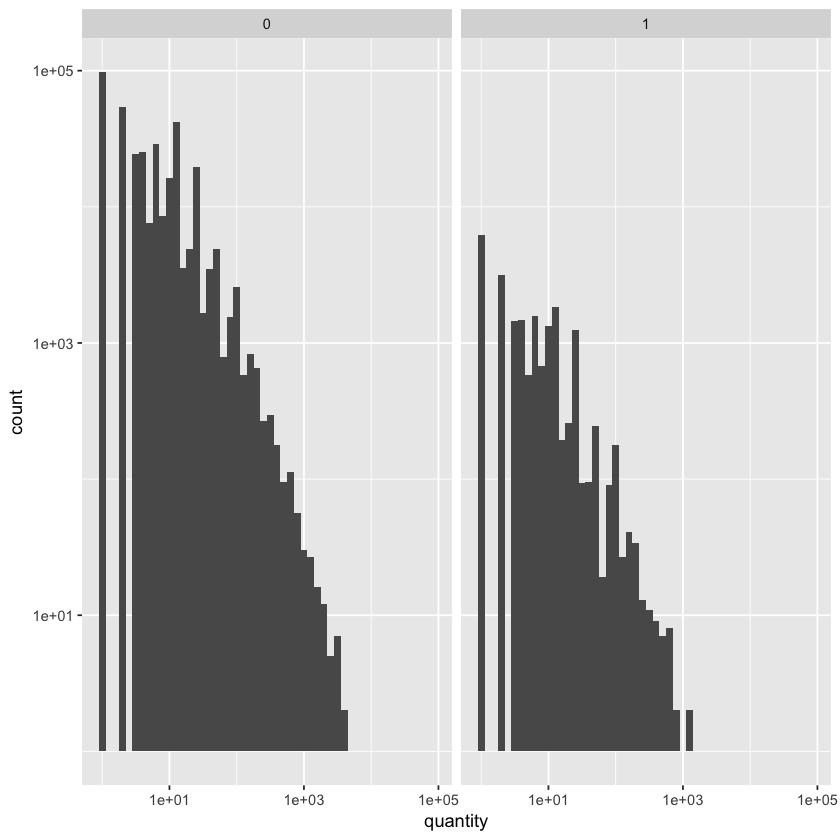

In [129]:
plot_desc_word_rows(train, "pink")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 34 rows containing missing values (geom_bar).”

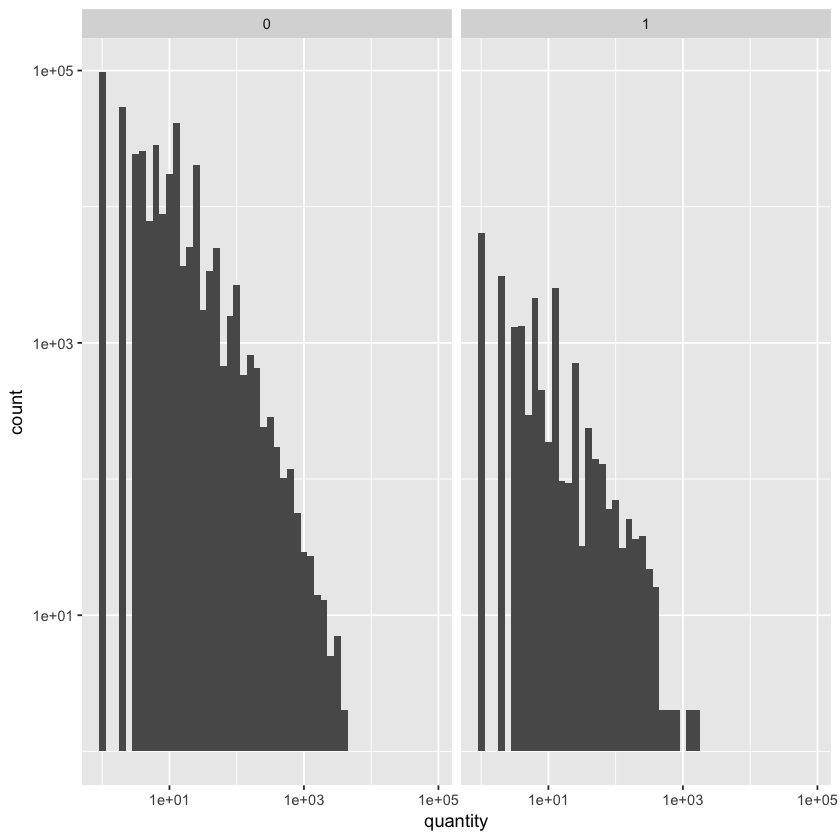

In [130]:
plot_desc_word_rows(train, "box")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


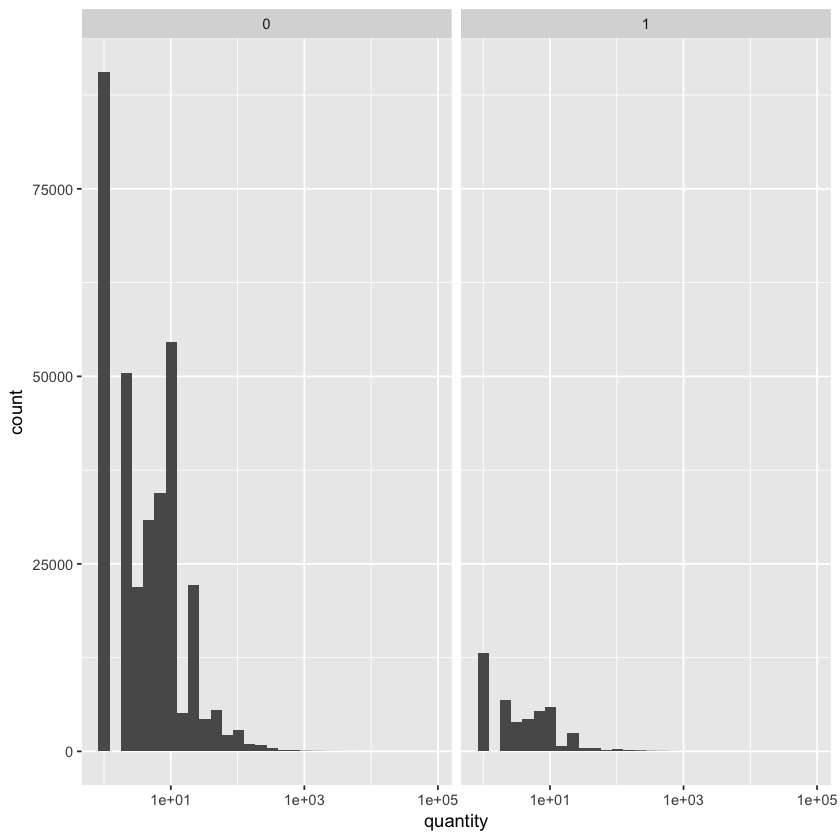

In [78]:
temp = plot_desc_word_rows(train, "set")
ggplot(data=temp, aes(quantity) ) + scale_x_log10() + facet_wrap(~has_word)  + geom_histogram()

In [ ]:
compare_hists = function(data, desc_word) {
    
}

In [57]:
test_word = train %>% get_desc_word_rows("set")
new_train = train%>% mutate(has_word = 0)
head(new_train)


id     date       time     invoice_id stock_id customer_id country       
1 330477 8/30/2011  12:26:00  357        198        7        united kingdom
2 113814 11/1/2011  14:54:00 6757       2747      410        united kingdom
3  51510 7/11/2011  16:21:00   52        755        7        united kingdom
4 257784 10/11/2011 14:52:00 3642       1942     1722        france        
5 431803 11/14/2011 14:59:00 2105         39     1159        united kingdom
6 473125 12/3/2010  11:35:00 1768        506     1009        united kingdom
  description                       unit_price quantity has_word
1 french blue metal door sign 3     2.46       1        0       
2 paper lantern 9 point deluxe star 6.65       4        0       
3 fruit salad bag charm             2.46       1        0       
4 set of 10 led dolly lights        6.25       2        0       
5 glitter christmas star            0.39       5        0       
6 set 20 napkins fairy cakes design 0.85       1        0

ERROR: Error: Unsupported index type: tbl_df


In [59]:
new_train[test_word]
head(new_train)

ERROR: Error: Unsupported index type: tbl_df


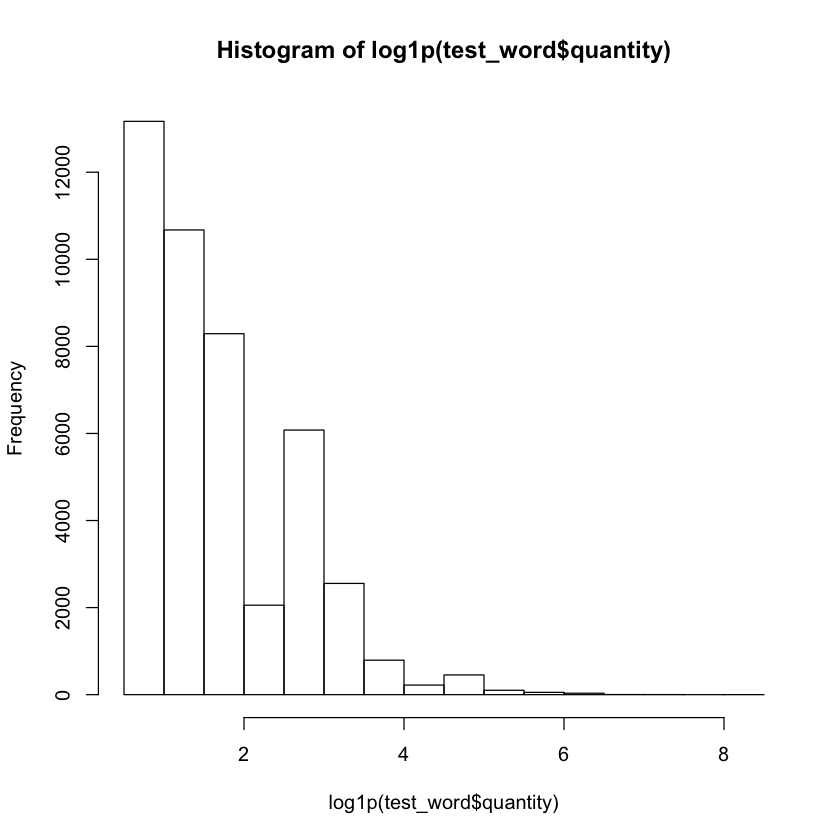

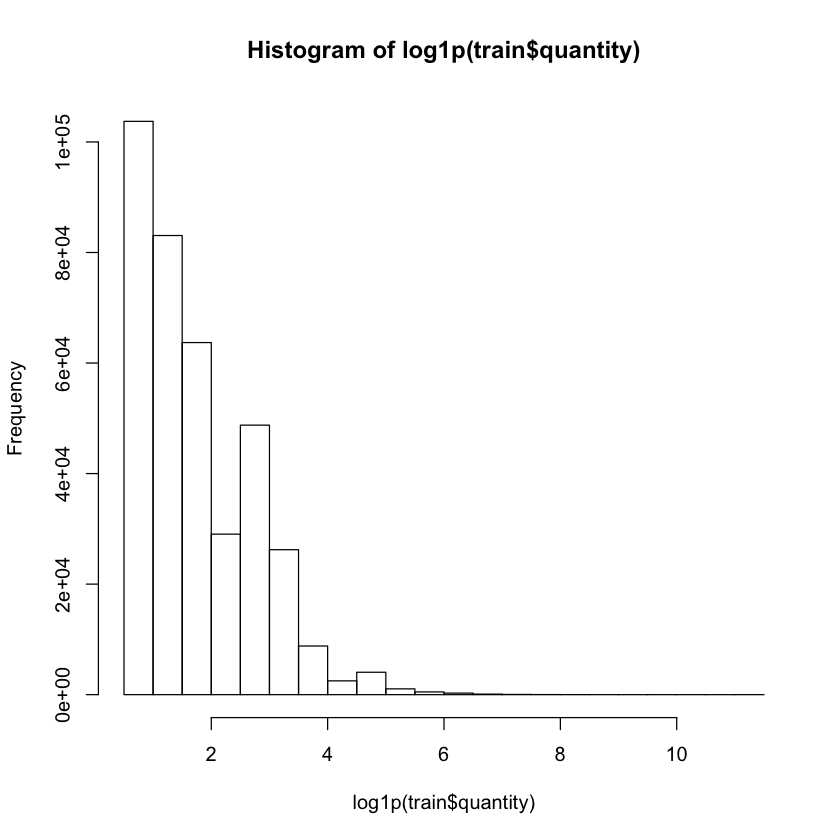

In [18]:
hist(log1p(test_word$quantity))
hist(log1p(train$quantity))

In [29]:
set_rows = grep("set",train$description)
head(set_rows)

[1]  4  6 15 21 22 24

In [39]:
length(grep("set", "set1"))

[1] 1

In [52]:
newtrain = train %>% mutate(word_present = length(description))

In [53]:
head(newtrain)

id     date       time     invoice_id stock_id customer_id country       
1 330477 8/30/2011  12:26:00  357        198        7        united kingdom
2 113814 11/1/2011  14:54:00 6757       2747      410        united kingdom
3  51510 7/11/2011  16:21:00   52        755        7        united kingdom
4 257784 10/11/2011 14:52:00 3642       1942     1722        france        
5 431803 11/14/2011 14:59:00 2105         39     1159        united kingdom
6 473125 12/3/2010  11:35:00 1768        506     1009        united kingdom
  description                       unit_price quantity word_present
1 french blue metal door sign 3     2.46       1        371899      
2 paper lantern 9 point deluxe star 6.65       4        371899      
3 fruit salad bag charm             2.46       1        371899      
4 set of 10 led dolly lights        6.25       2        371899      
5 glitter christmas star            0.39       5        371899      
6 set 20 napkins fairy cakes design 0.85       1        371899

In [ ]:
ggplot(data=train, aes(quantity) ) + scale_x_log10() + facet_wrap(grep("set", train$description))